In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plot

In [12]:
windts=pd.read_csv("OTBD.csv")

In [13]:
windts.head(5)

,station,valid,drct,sknt,gust,peak_wind_gust,peak_wind_drct,peak_wind_time
0,OTBD,01-01-00 15:00,20.0,4.0,NaN,NaN,NaN,NaN
1,OTBD,01-01-00 16:00,340.0,6.0,NaN,NaN,NaN,NaN
2,OTBD,01-01-00 17:00,310.0,5.0,NaN,NaN,NaN,NaN
3,OTBD,01-01-00 18:00,320.0,5.0,NaN,NaN,NaN,NaN
4,OTBD,01-01-00 19:00,320.0,5.0,NaN,NaN,NaN,NaN


In [14]:
windts.describe()

,drct,sknt,gust,peak_wind_gust,peak_wind_drct,peak_wind_time
count,240548.000000,257403.000000,3849.000000,0.0,0.0,0.0
mean,205.586889,7.369570,26.555913,NaN,NaN,NaN
std,124.832087,4.998783,4.579403,NaN,NaN,NaN
min,0.000000,0.000000,12.000000,NaN,NaN,NaN
25%,90.000000,4.000000,24.000000,NaN,NaN,NaN
50%,240.000000,7.000000,26.000000,NaN,NaN,NaN
75%,320.000000,10.000000,29.000000,NaN,NaN,NaN
max,360.000000,918.000000,79.700000,NaN,NaN,NaN


In [15]:
wind=pd.DataFrame({"dir":windts.drct,"knot":windts.sknt})

In [16]:
wind.head(5)

,dir,knot
0,20.0,4.0
1,340.0,6.0
2,310.0,5.0
3,320.0,5.0
4,320.0,5.0


In [17]:
wind.describe()

,dir,knot
count,240548.000000,257403.000000
mean,205.586889,7.369570
std,124.832087,4.998783
min,0.000000,0.000000
25%,90.000000,4.000000
50%,240.000000,7.000000
75%,320.000000,10.000000
max,360.000000,918.000000


In [18]:
windclean=wind.dropna(axis=0,how='any')

In [19]:
windclean.describe()

,dir,knot
count,240538.000000,240538.000000
mean,205.595436,7.746943
std,124.827644,4.951886
min,0.000000,0.000000
25%,90.000000,5.000000
50%,240.000000,7.000000
75%,320.000000,10.000000
max,360.000000,918.000000


In [20]:
windclean2=windclean[windclean.knot<55]

In [21]:
windclean2.describe()

,dir,knot
count,240516.000000,240516.000000
mean,205.600812,7.730002
std,124.824995,4.046812
min,0.000000,0.000000
25%,90.000000,5.000000
50%,240.000000,7.000000
75%,320.000000,10.000000
max,360.000000,46.650000


<AxesSubplot:xlabel='dir', ylabel='knot'>

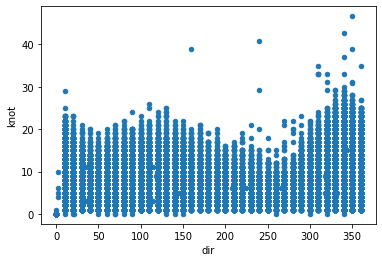

In [22]:
windclean2.plot.scatter(x='dir',y='knot')

In [23]:
windclean2.assign(mps=lambda x:x.knot*0.514444)

,dir,knot,mps
0,20.0,4.0,2.057776
1,340.0,6.0,3.086664
2,310.0,5.0,2.572220
3,320.0,5.0,2.572220
4,320.0,5.0,2.572220
...,...,...,...
257501,340.0,4.0,2.057776
257502,360.0,2.0,1.028888
257503,10.0,4.0,2.057776
257504,0.0,0.0,0.000000


In [24]:
windclean2.describe()

,dir,knot
count,240516.000000,240516.000000
mean,205.600812,7.730002
std,124.824995,4.046812
min,0.000000,0.000000
25%,90.000000,5.000000
50%,240.000000,7.000000
75%,320.000000,10.000000
max,360.000000,46.650000


<AxesSubplot:ylabel='Frequency'>

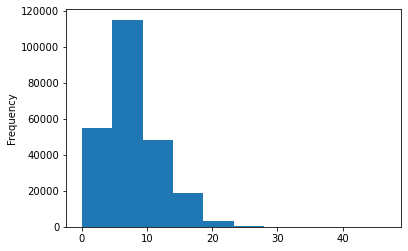

In [25]:
windclean2['knot'].plot.hist()

In [26]:
wind_0deg=windclean2[(windclean2.dir>(360-11.25)) | (windclean2.dir<=11.25)]

In [27]:
wind_0deg.describe()

,dir,knot
count,38501.000000,38501.000000
mean,208.719722,8.047160
std,171.803312,5.290479
min,0.000000,0.000000
25%,10.000000,4.000000
50%,350.000000,8.000000
75%,360.000000,12.000000
max,360.000000,46.650000


In [28]:
wind_0deg.to_csv("0deg.csv")

In [29]:
wind_22_5deg=windclean2[(windclean2.dir>(22.5-11.25))&(windclean2.dir<=(22.5+11.25))]

In [30]:
wind_22_5deg.describe()


,dir,knot
count,15851.000000,15851.000000
mean,24.328623,7.436576
std,4.954972,3.218538
min,20.000000,0.000000
25%,20.000000,5.000000
50%,20.000000,7.000000
75%,30.000000,10.000000
max,32.000000,23.000000


In [31]:
wind_45deg=windclean2[(windclean2.dir>(45-11.25))&(windclean2.dir<=(45+11.25))]

In [32]:
wind_45deg.describe()


,dir,knot
count,10508.000000,10508.000000
mean,44.947754,6.565838
std,5.001307,2.678476
min,35.000000,0.000000
25%,40.000000,4.000000
50%,40.000000,6.000000
75%,50.000000,8.000000
max,50.000000,20.000000


In [33]:
wind_67_5deg=windclean2[(windclean2.dir>(67.5-11.25))&(windclean2.dir<=(67.5+11.25))]
wind_67_5deg.describe()


,dir,knot
count,9703.000000,9703.000000
mean,65.101515,6.583840
std,4.999227,2.747866
min,60.000000,0.000000
25%,60.000000,4.000000
50%,70.000000,6.000000
75%,70.000000,8.000000
max,70.000000,21.000000


In [34]:
wind_90deg=windclean2[(windclean2.dir>(90-11.25))&(windclean2.dir<=(90+11.25))]
wind_90deg.describe()

,dir,knot
count,21476.000000,21476.000000
mean,91.252561,7.173648
std,8.039791,2.868198
min,80.000000,0.000000
25%,80.000000,5.000000
50%,90.000000,7.000000
75%,100.000000,9.000000
max,100.000000,24.000000


In [35]:
wind_112_5deg=windclean2[(windclean2.dir>(112.5-11.25))&(windclean2.dir<=(112.5+11.25))]
wind_112_5deg.describe()

,dir,knot
count,13662.000000,13662.000000
mean,114.674791,7.528265
std,4.989119,3.201081
min,110.000000,1.000000
25%,110.000000,5.000000
50%,110.000000,7.000000
75%,120.000000,10.000000
max,120.000000,26.000000


In [36]:
wind_135deg=windclean2[(windclean2.dir>(135-11.25))&(windclean2.dir<=(135+11.25))]
wind_135deg.describe()

,dir,knot
count,9969.000000,9969.000000
mean,135.150366,7.186177
std,4.998652,3.559577
min,130.000000,0.000000
25%,130.000000,4.000000
50%,140.000000,7.000000
75%,140.000000,10.000000
max,145.000000,25.000000


In [37]:
wind_157_5deg=windclean2[(windclean2.dir>(157.5-11.25))&(windclean2.dir<=(157.5+11.25))]
wind_157_5deg.describe()

,dir,knot
count,5530.000000,5530.000000
mean,153.737975,6.832007
std,4.838751,3.532065
min,150.000000,0.000000
25%,150.000000,4.000000
50%,150.000000,6.000000
75%,160.000000,9.000000
max,161.000000,39.000000


<AxesSubplot:xlabel='dir', ylabel='knot'>

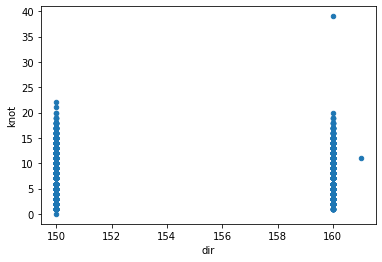

In [38]:
wind_157_5deg.plot.scatter(x='dir',y='knot')

In [39]:
wind_180deg=windclean2[(windclean2.dir>(180-11.25))&(windclean2.dir<=(180+11.25))]
wind_180deg.describe()

,dir,knot
count,4737.000000,4737.000000
mean,180.181550,5.567963
std,8.330229,2.976577
min,170.000000,1.000000
25%,170.000000,3.000000
50%,180.000000,5.000000
75%,190.000000,7.000000
max,190.000000,21.000000


In [40]:
n=np.arange(1,17,1)
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [41]:
dirx=np.arange(1,17.00,1)
for x in n:
    dirx[x-1]=x*22.5
dirx    
        

array([ 22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. , 202.5,
       225. , 247.5, 270. , 292.5, 315. , 337.5, 360. ])

In [42]:
wind_202_5deg=windclean2[(windclean2.dir>(202.5-11.25))&(windclean2.dir<=(202.5+11.25))]
wind_202_5deg.describe()

,dir,knot
count,4085.000000,4085.000000
mean,205.323868,5.121420
std,4.989718,2.452975
min,200.000000,1.000000
25%,200.000000,3.000000
50%,210.000000,5.000000
75%,210.000000,6.000000
max,210.000000,17.000000


In [43]:
wind_225deg=windclean2[(windclean2.dir>(225-11.25))&(windclean2.dir<=(225+11.25))]
wind_225deg.describe()

,dir,knot
count,5640.000000,5640.000000
mean,225.514894,4.655840
std,4.973253,2.080459
min,220.000000,1.000000
25%,220.000000,3.000000
50%,230.000000,4.000000
75%,230.000000,5.000000
max,230.000000,21.000000


In [44]:
wind_247_5deg=windclean2[(windclean2.dir>(247.5-11.25))&(windclean2.dir<=(247.5+11.25))]
wind_247_5deg.describe()

,dir,knot
count,6595.000000,6595.000000
mean,245.329795,4.378617
std,4.989490,1.742715
min,240.000000,1.000000
25%,240.000000,3.000000
50%,250.000000,4.000000
75%,250.000000,5.000000
max,250.000000,40.820000


In [45]:
wind_270deg=windclean2[(windclean2.dir>(270-11.25))&(windclean2.dir<=(270+11.25))]
wind_270deg.describe()

,dir,knot
count,8591.000000,8591.000000
mean,271.316028,4.786172
std,8.177576,1.830354
min,260.000000,0.000000
25%,260.000000,3.000000
50%,270.000000,4.000000
75%,280.000000,6.000000
max,280.000000,22.000000


In [46]:
wind_292_5deg=windclean2[(windclean2.dir>(292.5-11.25))&(windclean2.dir<=(292.5+11.25))]
wind_292_5deg.describe()

,dir,knot
count,18036.000000,18036.000000
mean,296.642825,7.164592
std,4.722538,2.737960
min,290.000000,0.000000
25%,290.000000,5.000000
50%,300.000000,7.000000
75%,300.000000,9.000000
max,300.000000,23.000000


In [47]:
wind_315deg=windclean2[(windclean2.dir>(315-11.25))&(windclean2.dir<=(315+11.25))]
wind_315deg.describe()

,dir,knot
count,35439.000000,35439.000000
mean,315.103586,9.049627
std,4.998913,3.498918
min,310.000000,0.000000
25%,310.000000,7.000000
50%,320.000000,9.000000
75%,320.000000,11.000000
max,321.000000,34.990000


In [48]:
wind_337_5deg=windclean2[(windclean2.dir>(337.5-11.25))&(windclean2.dir<=(337.5+11.25))]
wind_337_5deg.describe()

,dir,knot
count,32193.000000,32193.000000
mean,334.564253,10.523975
std,4.981150,4.697359
min,330.000000,0.000000
25%,330.000000,7.000000
50%,330.000000,10.000000
75%,340.000000,14.000000
max,344.000000,42.760000


In [49]:
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [50]:
dirx=np.arange(1,17.00,1)
for x in n:
    dirx[x-1]=x*22.5    
dirx

array([ 22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. , 202.5,
       225. , 247.5, 270. , 292.5, 315. , 337.5, 360. ])

In [51]:
for x in n:
    windx=windclean2[(windclean2.dir>(dirx[x-1]-11.25))&(windclean2.dir<=(dirx[x-1]+11.25))]


In [52]:
windx.describe()

,dir,knot
count,22301.000000,22301.000000
mean,355.089906,9.490947
std,4.999304,4.991194
min,350.000000,1.000000
25%,350.000000,5.000000
50%,360.000000,9.000000
75%,360.000000,13.000000
max,360.000000,46.650000


In [53]:
windts.head(5)

,station,valid,drct,sknt,gust,peak_wind_gust,peak_wind_drct,peak_wind_time
0,OTBD,01-01-00 15:00,20.0,4.0,NaN,NaN,NaN,NaN
1,OTBD,01-01-00 16:00,340.0,6.0,NaN,NaN,NaN,NaN
2,OTBD,01-01-00 17:00,310.0,5.0,NaN,NaN,NaN,NaN
3,OTBD,01-01-00 18:00,320.0,5.0,NaN,NaN,NaN,NaN
4,OTBD,01-01-00 19:00,320.0,5.0,NaN,NaN,NaN,NaN


In [56]:
windraw=pd.DataFrame({"date_time":windts.valid,"dir":windts.drct,"knot":windts.sknt})

In [57]:
windraw.head(5)

,date_time,dir,knot
0,01-01-00 15:00,20.0,4.0
1,01-01-00 16:00,340.0,6.0
2,01-01-00 17:00,310.0,5.0
3,01-01-00 18:00,320.0,5.0
4,01-01-00 19:00,320.0,5.0


In [58]:
windraw[['date', 'time']] = windraw['date_time'].str.split(' ', expand=True)

In [59]:
windraw.head(5)

,date_time,dir,knot,date,time
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00


In [60]:
windraw[['day', 'month','year']] = windraw['date'].str.split('-', expand=True)

In [61]:
windraw.head(5)

,date_time,dir,knot,date,time,day,month,year
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00,01,01,00
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00,01,01,00
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00,01,01,00
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00,01,01,00
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00,01,01,00


In [62]:
windraw['month'].nunique()

12

In [63]:
windraw=windraw.dropna(axis=0,how='any')
windraw.describe()

,dir,knot
count,240538.000000,240538.000000
mean,205.595436,7.746943
std,124.827644,4.951886
min,0.000000,0.000000
25%,90.000000,5.000000
50%,240.000000,7.000000
75%,320.000000,10.000000
max,360.000000,918.000000


In [64]:
windraw=windraw[windraw.knot<=55]
windraw.describe()

,dir,knot
count,240516.000000,240516.000000
mean,205.600812,7.730002
std,124.824995,4.046812
min,0.000000,0.000000
25%,90.000000,5.000000
50%,240.000000,7.000000
75%,320.000000,10.000000
max,360.000000,46.650000


In [65]:
windraw['mps']=windraw.knot*0.514444
windraw.head(5)

,date_time,dir,knot,date,time,day,month,year,mps
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00,01,01,00,2.057776
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00,01,01,00,3.086664
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00,01,01,00,2.572220
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00,01,01,00,2.572220
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00,01,01,00,2.572220


In [66]:
wind_dec_alldir=windraw[windraw.month=="12"]

In [67]:
wind_dec_alldir.head(5)

,date_time,dir,knot,date,time,day,month,year,mps
6597,01-12-00 1:00,120.0,4.0,01-12-00,1:00,01,12,00,2.057776
6598,01-12-00 2:00,110.0,2.0,01-12-00,2:00,01,12,00,1.028888
6599,01-12-00 3:00,120.0,1.0,01-12-00,3:00,01,12,00,0.514444
6600,01-12-00 5:00,140.0,8.0,01-12-00,5:00,01,12,00,4.115552
6601,01-12-00 6:00,140.0,9.0,01-12-00,6:00,01,12,00,4.629996


In [68]:
wind_dec_alldir.describe()

,dir,knot,mps
count,21391.000000,21391.000000,21391.000000
mean,240.210275,6.991280,3.596622
std,109.936269,3.391736,1.744858
min,0.000000,0.000000,0.000000
25%,140.000000,5.000000,2.572220
50%,300.000000,7.000000,3.601108
75%,320.000000,9.000000,4.629996
max,360.000000,46.650000,23.998813


In [69]:
wind_nov_alldir=windraw[windraw.month=="11"]

In [70]:
wind_nov_alldir.describe()

,dir,knot,mps
count,20268.000000,20268.000000,20268.000000
mean,219.842856,7.117615,3.661615
std,122.495284,3.507168,1.804241
min,0.000000,0.000000,0.000000
25%,100.000000,5.000000,2.572220
50%,290.000000,7.000000,3.601108
75%,320.000000,9.000000,4.629996
max,360.000000,33.000000,16.976652


In [71]:
wind_oct_alldir=windraw[windraw.month=="10"]
wind_oct_alldir.describe()

,dir,knot,mps
count,19133.000000,19133.000000,19133.000000
mean,182.188888,6.523371,3.355909
std,128.969455,3.387288,1.742570
min,0.000000,0.000000,0.000000
25%,60.000000,4.000000,2.057776
50%,140.000000,6.000000,3.086664
75%,320.000000,8.000000,4.115552
max,360.000000,31.000000,15.947764


In [72]:
wind_sep_alldir=windraw[windraw.month=="09"]
wind_sep_alldir.describe()

,dir,knot,mps
count,18229.000000,18229.000000,18229.000000
mean,171.192605,6.831422,3.514384
std,129.153800,3.518229,1.809932
min,0.000000,0.000000,0.000000
25%,50.000000,4.000000,2.057776
50%,120.000000,6.000000,3.086664
75%,320.000000,9.000000,4.629996
max,360.000000,26.000000,13.375544


In [73]:
wind_aug_alldir=windraw[windraw.month=="08"]
wind_aug_alldir.describe()

,dir,knot,mps
count,19046.000000,19046.000000,19046.000000
mean,154.696262,7.159762,3.683296
std,123.465380,3.764983,1.936873
min,0.000000,0.000000,0.000000
25%,50.000000,4.000000,2.057776
50%,100.000000,7.000000,3.601108
75%,290.000000,9.000000,4.629996
max,360.000000,29.160000,15.001187


In [74]:
wind_jul_alldir=windraw[windraw.month=="07"]
wind_jul_alldir.describe()

,dir,knot,mps
count,20125.000000,20125.000000,20125.000000
mean,185.836522,7.924479,4.076701
std,128.402537,4.208029,2.164795
min,0.000000,0.000000,0.000000
25%,60.000000,5.000000,2.572220
50%,190.000000,7.000000,3.601108
75%,320.000000,10.000000,5.144440
max,360.000000,33.050000,17.002374


In [75]:
wind_jun_alldir=windraw[windraw.month=="06"]
wind_jun_alldir.describe()

,dir,knot,mps
count,19255.000000,19255.000000,19255.000000
mean,239.890055,9.228170,4.747377
std,119.795421,4.866362,2.503471
min,0.000000,0.000000,0.000000
25%,130.000000,5.000000,2.572220
50%,300.000000,8.000000,4.115552
75%,330.000000,12.000000,6.173328
max,360.000000,34.990000,18.000396


In [76]:
import seaborn as sns

In [77]:
windraw.head(5)

,date_time,dir,knot,date,time,day,month,year,mps
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00,01,01,00,2.057776
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00,01,01,00,3.086664
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00,01,01,00,2.572220
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00,01,01,00,2.572220
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00,01,01,00,2.572220


In [78]:
print(windraw.dtypes)

date_time     object
dir          float64
knot         float64
date          object
time          object
day           object
month         object
year          object
mps          float64
dtype: object


In [79]:
windraw['month'] = windraw['month'].astype(float)
print(windraw.dtypes)

date_time     object
dir          float64
knot         float64
date          object
time          object
day           object
month        float64
year          object
mps          float64
dtype: object


In [80]:
dir_mon=pd.DataFrame({'dir':windraw.dir,'month':windraw.month})

In [81]:
dir_mon.head(5)

,dir,month
0,20.0,1.0
1,340.0,1.0
2,310.0,1.0
3,320.0,1.0
4,320.0,1.0


In [82]:
len(dir_mon)

240516

In [83]:
dir_mon.describe()

,dir,month
count,240516.000000,240516.000000
mean,205.600812,6.437235
std,124.824995,3.509532
min,0.000000,1.000000
25%,90.000000,3.000000
50%,240.000000,6.000000
75%,320.000000,10.000000
max,360.000000,12.000000


In [84]:
dir_mon_array=dir_mon.to_numpy()
dir_mon_array

array([[ 20.,   1.],
       [340.,   1.],
       [310.,   1.],
       ...,
       [ 10.,   3.],
       [  0.,   3.],
       [360.,   3.]])

<AxesSubplot:>

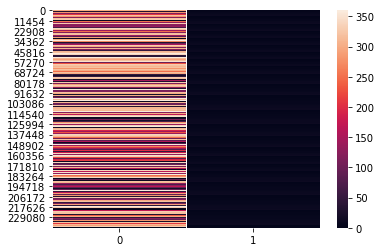

In [85]:
sns.heatmap(dir_mon_array)

In [86]:
dir_mon.describe()

,dir,month
count,240516.000000,240516.000000
mean,205.600812,6.437235
std,124.824995,3.509532
min,0.000000,1.000000
25%,90.000000,3.000000
50%,240.000000,6.000000
75%,320.000000,10.000000
max,360.000000,12.000000


In [87]:
dir_mon['count']=1

In [88]:
dir_mon.describe()

,dir,month,count
count,240516.000000,240516.000000,240516.0
mean,205.600812,6.437235,1.0
std,124.824995,3.509532,0.0
min,0.000000,1.000000,1.0
25%,90.000000,3.000000,1.0
50%,240.000000,6.000000,1.0
75%,320.000000,10.000000,1.0
max,360.000000,12.000000,1.0


In [89]:
dir_mon_pvt=pd.pivot_table(dir_mon,index=['dir'],columns=['month'],aggfunc=np.sum)
dir_mon_pvt

count                                                                  \
month    1.0     2.0     3.0     4.0     5.0     6.0     7.0     8.0     9.0    
dir                                                                             
0.0     434.0   341.0   248.0   245.0   278.0   198.0   300.0   405.0   433.0   
2.0       NaN     1.0     NaN     NaN     NaN     1.0     NaN     NaN     NaN   
10.0    528.0   728.0   880.0  1103.0  1258.0   962.0  1251.0  1260.0  1114.0   
20.0    413.0   510.0   616.0   792.0   865.0   650.0   973.0  1039.0  1012.0   
21.0      NaN     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
30.0    296.0   392.0   507.0   652.0   548.0   439.0   806.0   896.0   864.0   
32.0      NaN     NaN     NaN     NaN     NaN     1.0     NaN     NaN     NaN   
35.0      NaN     NaN     NaN     NaN     1.0     NaN     NaN     NaN     NaN   
40.0    188.0   263.0   349.0   506.0   425.0   372.0   701.0   779.0   704.0   
41.0      NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
50.0    180.0   236.0   336.0   491.0   434.0   338.0   675.0   863.0   688.0   
60.0    182.0   268.0   343.0   442.0   357.0   238.0   621.0   800.0   635.0   
70.0    183.0   265.0   415.0   450.0   354.0   250.0   556.0   838.0   633.0   
80.0    247.0   385.0   553.0   533.0   386.0   249.0   657.0   863.0   670.0   
90.0    429.0   531.0   686.0   606.0   505.0   327.0   786.0  1035.0   736.0   
100.0   593.0   737.0   818.0   711.0   623.0   367.0   762.0  1049.0   837.0   
110.0   727.0   751.0   837.0   689.0   556.0   252.0   524.0   620.0   598.0   
114.0     1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
115.0     NaN     NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
118.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
120.0   834.0   824.0   795.0   669.0   472.0   160.0   387.0   367.0   346.0   
130.0   763.0   564.0   541.0   576.0   358.0   142.0   256.0   265.0   246.0   
139.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
140.0   820.0   597.0   499.0   495.0   384.0   141.0   257.0   284.0   245.0   
145.0     NaN     NaN     NaN     1.0     NaN     NaN     NaN     NaN     NaN   
150.0   521.0   408.0   355.0   403.0   266.0    89.0   160.0   191.0   153.0   
160.0   261.0   252.0   219.0   277.0   186.0    53.0    97.0   130.0   107.0   
161.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
170.0   198.0   172.0   144.0   231.0   130.0    62.0    94.0   101.0   103.0   
180.0   200.0   117.0   158.0   171.0   115.0    67.0    92.0    93.0   121.0   
190.0   183.0   143.0   165.0   193.0   189.0    82.0   131.0   134.0   113.0   
200.0   197.0   118.0   131.0   242.0   185.0   129.0   182.0   169.0   126.0   
208.0     NaN     NaN     NaN     NaN     NaN     1.0     NaN     NaN     NaN   
210.0   180.0   122.0   135.0   265.0   272.0   188.0   183.0   216.0   148.0   
220.0   191.0   134.0   170.0   193.0   305.0   253.0   272.0   247.0   224.0   
225.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     1.0     NaN   
229.0     NaN     NaN     NaN     NaN     1.0     NaN     NaN     NaN     NaN   
230.0   232.0   161.0   236.0   237.0   289.0   334.0   365.0   331.0   281.0   
240.0   250.0   164.0   189.0   238.0   284.0   426.0   333.0   243.0   277.0   
250.0   290.0   198.0   234.0   240.0   257.0   431.0   444.0   302.0   292.0   
260.0   219.0   138.0   136.0   154.0   190.0   282.0   291.0   183.0   174.0   
266.0     NaN     NaN     NaN     NaN     NaN     1.0     NaN     NaN     NaN   
270.0   278.0   169.0   133.0   178.0   167.0   347.0   315.0   182.0   156.0   
280.0   418.0   226.0   194.0   217.0   259.0   426.0   382.0   227.0   190.0   
290.0  1099.0   510.0   324.0   339.0   344.0   474.0   383.0   254.0   280.0   
300.0  2106.0  1054.0   702.0   540.0   680.0  1002.0   626.0   368.0   409.0   
310.0  2459.0  1856.0  1390.0   892.0  

<AxesSubplot:xlabel='None-month', ylabel='dir'>

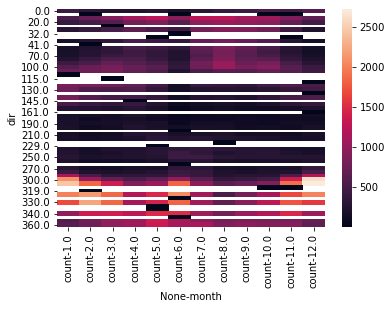

In [90]:
sns.heatmap(dir_mon_pvt)

In [91]:
import math

In [92]:
windraw.head()

,date_time,dir,knot,date,time,day,month,year,mps
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00,01,1.0,00,2.057776
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00,01,1.0,00,3.086664
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00,01,1.0,00,2.572220
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00,01,1.0,00,2.572220
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00,01,1.0,00,2.572220


In [97]:
windraw['mps_ceiling']=1

In [98]:
windraw.head()

,date_time,dir,knot,date,time,day,month,year,mps,mps ceiling,mps_ceiling
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00,01,1.0,00,2.057776,1,1
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00,01,1.0,00,3.086664,1,1
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00,01,1.0,00,2.572220,1,1
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00,01,1.0,00,2.572220,1,1
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00,01,1.0,00,2.572220,1,1


In [99]:
windraw['mps_ceiling']=round(windraw.mps/3)*3
windraw.head()

,date_time,dir,knot,date,time,day,month,year,mps,mps ceiling,mps_ceiling
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00,01,1.0,00,2.057776,1,3.0
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00,01,1.0,00,3.086664,1,3.0
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00,01,1.0,00,2.572220,1,3.0
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00,01,1.0,00,2.572220,1,3.0
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00,01,1.0,00,2.572220,1,3.0


In [102]:
windraw.drop(columns=['mps ceiling'])

,date_time,dir,knot,date,time,day,month,year,mps,mps_ceiling,dir_ceiling
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00,01,1.0,00,2.057776,3.0,22.5
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00,01,1.0,00,3.086664,3.0,337.5
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00,01,1.0,00,2.572220,3.0,315.0
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00,01,1.0,00,2.572220,3.0,315.0
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00,01,1.0,00,2.572220,3.0,315.0
...,...,...,...,...,...,...,...,...,...,...,...
257501,06-03-22 21:30,340.0,4.0,06-03-22,21:30,06,3.0,22,2.057776,3.0,337.5
257502,06-03-22 22:00,360.0,2.0,06-03-22,22:00,06,3.0,22,1.028888,0.0,360.0
257503,06-03-22 22:30,10.0,4.0,06-03-22,22:30,06,3.0,22,2.057776,3.0,0.0
257504,06-03-22 23:00,0.0,0.0,06-03-22,23:00,06,3.0,22,0.000000,0.0,0.0


In [104]:
windraw.describe()

,dir,knot,month,mps,mps ceiling,mps_ceiling,dir_ceiling
count,240516.000000,240516.000000,240516.000000,240516.000000,240516.0,240516.000000,240516.000000
mean,205.600812,7.730002,6.437235,3.976653,1.0,4.215013,205.408715
std,124.824995,4.046812,3.509532,2.081858,0.0,2.088351,126.433182
min,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000
25%,90.000000,5.000000,3.000000,2.572220,1.0,3.000000,90.000000
50%,240.000000,7.000000,6.000000,3.601108,1.0,3.000000,247.500000
75%,320.000000,10.000000,10.000000,5.144440,1.0,6.000000,315.000000
max,360.000000,46.650000,12.000000,23.998813,1.0,24.000000,360.000000


In [105]:
windraw['dir_ceiling']=round(windraw.dir/22.5)*22.5
windraw.head()

,date_time,dir,knot,date,time,day,month,year,mps,mps ceiling,mps_ceiling,dir_ceiling
0,01-01-00 15:00,20.0,4.0,01-01-00,15:00,01,1.0,00,2.057776,1,3.0,22.5
1,01-01-00 16:00,340.0,6.0,01-01-00,16:00,01,1.0,00,3.086664,1,3.0,337.5
2,01-01-00 17:00,310.0,5.0,01-01-00,17:00,01,1.0,00,2.572220,1,3.0,315.0
3,01-01-00 18:00,320.0,5.0,01-01-00,18:00,01,1.0,00,2.572220,1,3.0,315.0
4,01-01-00 19:00,320.0,5.0,01-01-00,19:00,01,1.0,00,2.572220,1,3.0,315.0


In [106]:
windraw['dir_ceiling'].nunique()

17

In [107]:
windraw['dir_ceiling']=windraw.dir_ceiling.replace(360,0)

In [108]:
windraw.describe()

,dir,knot,month,mps,mps ceiling,mps_ceiling,dir_ceiling
count,240516.000000,240516.000000,240516.000000,240516.000000,240516.0,240516.000000,240516.000000
mean,205.600812,7.730002,6.437235,3.976653,1.0,4.215013,172.028981
std,124.824995,4.046812,3.509532,2.081858,0.0,2.088351,128.714481
min,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000
25%,90.000000,5.000000,3.000000,2.572220,1.0,3.000000,45.000000
50%,240.000000,7.000000,6.000000,3.601108,1.0,3.000000,157.500000
75%,320.000000,10.000000,10.000000,5.144440,1.0,6.000000,315.000000
max,360.000000,46.650000,12.000000,23.998813,1.0,24.000000,337.500000


In [109]:
dir_mon_2=pd.DataFrame({'month':windraw.month,'dir':windraw.dir_ceiling})
dir_mon_2.head()

,month,dir
0,1.0,22.5
1,1.0,337.5
2,1.0,315.0
3,1.0,315.0
4,1.0,315.0


In [110]:
windraw['mps'].count()

240516

In [111]:
dir_mon_2['percent']=100/windraw['mps'].count()

In [112]:
dir_mon_pvt_2=pd.pivot_table(dir_mon_2,index=['dir'],columns=['month'],aggfunc=np.sum)
dir_mon_pvt_2['percent']

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
dir,,,,,,,,,,,,
0.0,0.898485,1.098056,1.293469,1.455205,1.777844,1.423606,1.502603,1.392839,1.384939,1.393670,1.288064,1.098887
22.5,0.294783,0.375027,0.467329,0.600376,0.587487,0.453192,0.739660,0.804520,0.779990,0.713466,0.473149,0.301435
45.0,0.153004,0.207886,0.284804,0.414525,0.357565,0.295199,0.572103,0.682699,0.578756,0.465250,0.238238,0.118911
67.5,0.151757,0.221607,0.315156,0.370869,0.295614,0.202897,0.489365,0.681036,0.527200,0.410368,0.235743,0.132632
90.0,0.527616,0.687272,0.855245,0.769180,0.629480,0.392074,0.916779,1.225282,0.932578,0.980392,0.624075,0.389163
112.5,0.649437,0.654842,0.678957,0.564619,0.427414,0.171298,0.378769,0.410368,0.392489,0.478970,0.478970,0.394153
135.0,0.658168,0.482712,0.432404,0.445708,0.308503,0.117664,0.213291,0.228259,0.204144,0.260274,0.374195,0.419515
157.5,0.325134,0.274410,0.238654,0.282725,0.187929,0.059040,0.106854,0.133463,0.108101,0.130968,0.207471,0.244474
180.0,0.241564,0.179614,0.194166,0.247385,0.180445,0.087728,0.131800,0.136373,0.140115,0.115169,0.158409,0.156746


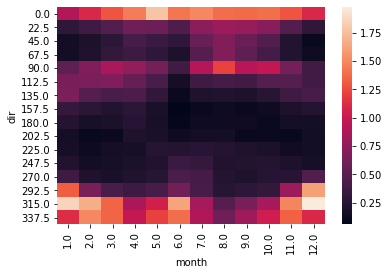

In [113]:
from seaborn import color_palette
sns.heatmap(dir_mon_pvt_2['percent'])
sns.color_palette("Spectral", as_cmap=True)
